In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analyze

In [2]:
### Input ###
Dataset = "BreastCancer"
Directory = "/Users/simondn/Documents/RashomonActiveLearning/Results/OptimalThreshold/"

### All values ###
ThresholdValuesALL = pd.read_csv(os.path.join(Directory,Dataset,"Processed/ThresholdValuesStorage.csv"))
Epsilon_F1ScoreALL = pd.read_csv(os.path.join(Directory,Dataset,"Processed/Epsilon_F1ScoreStorage.csv"))
Epsilon_ClassAccuracyALL = pd.read_csv(os.path.join(Directory,Dataset,"Processed/Epsilon_ClassAccuracyStorage.csv"))

### Average Values ###
ThresholdValues_Mean = np.mean(ThresholdValuesALL, axis =0)
Epsilon_F1Score_Mean = np.mean(Epsilon_F1ScoreALL, axis =0)
Epsilon_ClassAccuracy_Mean = np.mean(Epsilon_ClassAccuracyALL, axis =0)

In [3]:
print(ThresholdValuesALL.shape[0])
print(Epsilon_F1ScoreALL.shape[0])
print(Epsilon_ClassAccuracyALL.shape[0])
# np.where(Epsilon_F1Score_Mean == np.max(Epsilon_F1Score_Mean))

24
24
24


In [4]:
ThresholdValues_Mean.iloc[np.where(Epsilon_F1Score_Mean == np.max(Epsilon_F1Score_Mean))]

6666    0.067708
6667    0.067718
6668    0.067729
6669    0.067739
6670    0.067749
          ...   
7496    0.076139
7497    0.076149
7498    0.076159
7499    0.076169
9999    0.101562
Length: 835, dtype: float64

In [5]:
# np.where(Epsilon_F1Score_Mean == np.max(Epsilon_F1Score_Mean))

# Accuracy by Rashomon Threshold

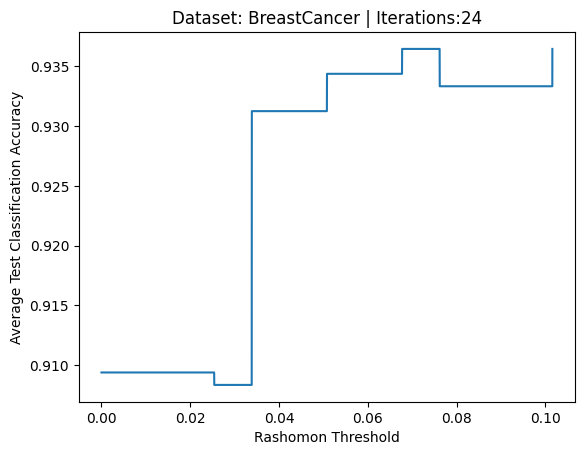

In [6]:
### Plot Accuracy ###
plt.plot(ThresholdValues_Mean, Epsilon_ClassAccuracy_Mean, label="Average Classification Accuracy")
plt.xlabel("Rashomon Threshold")
plt.ylabel("Average Test Classification Accuracy")
plt.title("Dataset: " + Dataset + " | Iterations:" +str(ThresholdValuesALL.shape[0]))
# plt.xticks(np.arange(0, 0.05, 0.005)) 
plt.show()

# F1 by Rashomon Threshold

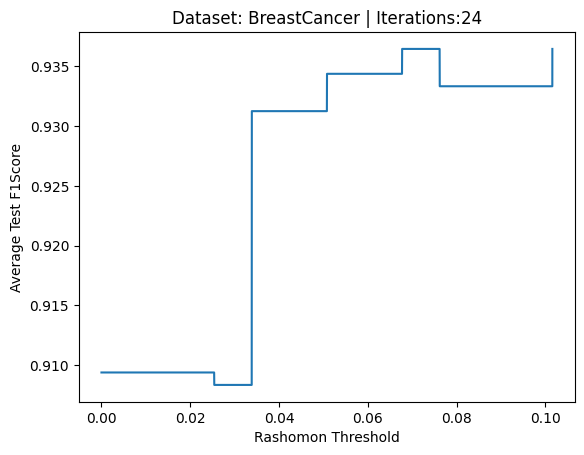

In [7]:
plt.plot(ThresholdValues_Mean, Epsilon_F1Score_Mean, label="Average F1 Score Accuracy")
plt.xlabel("Rashomon Threshold")
plt.ylabel("Average Test F1Score")
plt.title("Dataset: " + Dataset + " | Iterations:" +str(ThresholdValuesALL.shape[0]))
# plt.xticks(np.arange(0, 0.05, 0.005)) 
plt.show()

---

In [8]:
# ### Import Packages ###
# import os
# import argparse
# import numpy as np
# import math as math
# import pandas as pd
# from scipy import stats
# import random as random
# from sklearn.metrics import f1_score
# from treeFarms.treefarms.model.treefarms import TREEFARMS

# ### IMPORT FUNCTIONS ###
# from utils.Auxiliary import *


# ### SET UP ###

# # Input #
# DataFile = "Bar7"
# rashomon_bound_adder = 0.04
# regularization = 0.01
# TestProportion = 0.2
# CandidateProportion = 0.8
# Seed = 0

# # Load Data #
# df = LoadData(DataFile)
# random.seed(Seed)
# np.random.seed(Seed)

# # Train Test Candidate Split #
# from utils.Main import TrainTestCandidateSplit
# df_Train, df_Test, df_Candidate = TrainTestCandidateSplit(df, TestProportion, CandidateProportion)

# ### TRAIN TREEFARMS ###
# # TreeFarms #
# config = {"regularization": regularization, "rashomon_bound_adder": rashomon_bound_adder}
# TreeFarmsModel = TREEFARMS(config)
# TreeFarmsModel.fit(df_Train.loc[:, df_Train.columns != "Y"], df_Train["Y"])
# TreeCount = TreeFarmsModel.get_tree_count()
# print("Number of trees:" + str(TreeCount))

# # Duplicate and Unique #
# PredictionArray_Duplicate = pd.DataFrame(np.array([TreeFarmsModel[i].predict(df_Train.loc[:, df_Train.columns != "Y"]) for i in range(TreeCount)]))
# PredictionArray_Unique = pd.DataFrame(PredictionArray_Duplicate).drop_duplicates(keep='first', ignore_index=False)
# TrueValues = df_Train["Y"].to_numpy()
# PredictionArray = PredictionArray_Unique

# ### TRAINING ACCURACY ###
# # Training Accuracy #
# TreeClassificationAccuracy = PredictionArray.eq(TrueValues, axis=1).mean(axis=1)
# BestAccuracy = float(np.max(TreeClassificationAccuracy))

# # Threshold Values #
# EpsilonVec = BestAccuracy - TreeClassificationAccuracy
# MinEpsilon = float(np.min(EpsilonVec))
# MaxEpsilon = float(np.max(EpsilonVec))
# ThresholdValues = np.linspace(MinEpsilon, MaxEpsilon, 10000)
# ThresholdValues = np.arange(MinEpsilon, MaxEpsilon + 0.000001, 0.000001)


# ### TEST ACCURACY ###
# # Set Up #
# ModelIndicesVec = []
# Epsilon_F1Score = []
# Epsilon_ClassAccuracy = []
# ModelIndicesOld = []  # Initialize as empty list
# F1ScoreOld = None
# ClassAccuracyOld = None


# for Threshold in ThresholdValues:

#     # Filter Models Based on Threshold
#     ModelIndices = EpsilonVec[EpsilonVec <= Threshold].index.tolist()

#     # Only recalculate F1 and Class Accuracy if new models were added
#     if ModelIndices == ModelIndicesOld:
#         # Use stored values
#         F1Score = F1ScoreOld
#         ClassAccuracy = ClassAccuracyOld
#     else: 
#         # Test Set Predictions
#         Test_Predictions = pd.DataFrame(
#             np.array([TreeFarmsModel[i].predict(df_Test.loc[:, df_Test.columns != "Y"]) for i in ModelIndices])
#         )
#         Test_Predictions.columns = df_Test.index.astype(str)

#         # Compute Ensemble Prediction (Mode)
#         mode_result = stats.mode(Test_Predictions, axis=0, keepdims=True)
#         EnsemblePrediction = pd.Series(mode_result.mode.flatten())
#         EnsemblePrediction.index = df_Test.index

#         # Compute Metrics
#         F1Score = float(f1_score(df_Test["Y"], EnsemblePrediction, average='micro'))
#         ClassAccuracy = float(np.mean(EnsemblePrediction == df_Test["Y"]))

#         # Store Old ModelIndices
#         ModelIndicesOld = ModelIndices.copy()
#         F1ScoreOld = F1Score
#         ClassAccuracyOld = ClassAccuracy

#     # Append Metrics
#     ModelIndicesVec.append(ModelIndices)
#     Epsilon_F1Score.append(F1Score)
#     Epsilon_ClassAccuracy.append(ClassAccuracy)